2022-05-29 18:28:01.932252: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-29 18:28:01.932281: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-29 18:28:08.675769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-29 18:28:08.676007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-29 18:28:08.676189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: lib

Epoch 1/5
4314/4314 [==============================] - 86s 19ms/step - loss: 0.0020
Epoch 2/5
4314/4314 [==============================] - 95s 22ms/step - loss: 8.1960e-04
Epoch 3/5
4314/4314 [==============================] - 98s 23ms/step - loss: 4.3375e-04
Epoch 4/5
4314/4314 [==============================] - 98s 23ms/step - loss: 4.0369e-04
Epoch 5/5
34/34 [==============================] - 1s 11ms/step


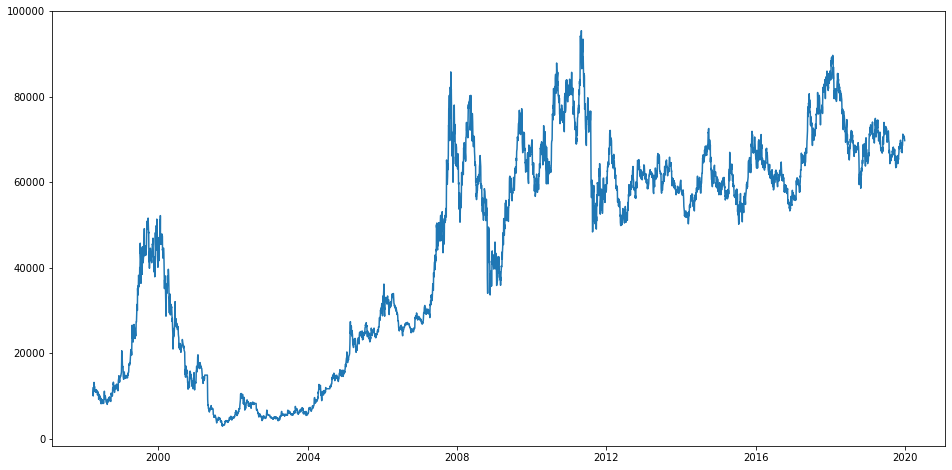

In [1]:
!pip install finance-datareader

import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime
import FinanceDataReader as fdr
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM

Text(0, 0.5, 'price')

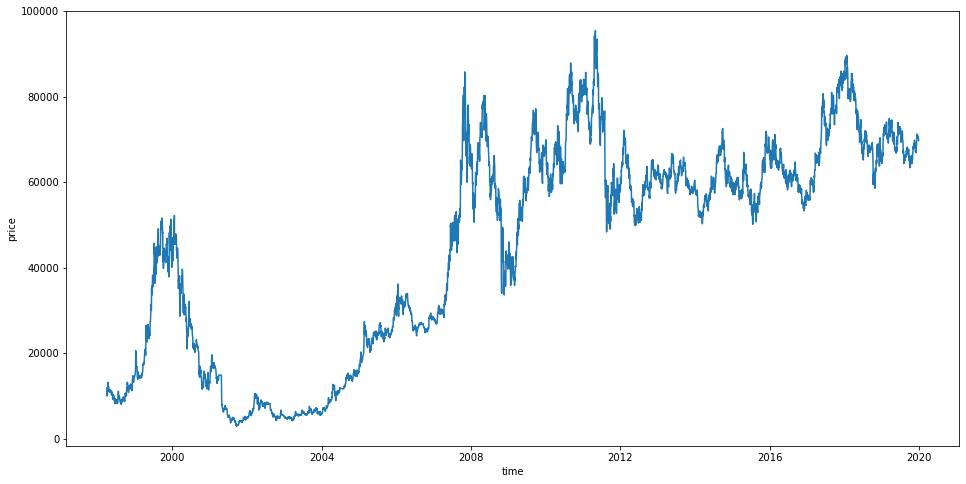

In [6]:
#df_krx = fdr.StockListing('KOSPI')

start = datetime.datetime(1990,1,1)
end = datetime.datetime(2020,1,1)

df = fdr.DataReader('003550',start, end)  # 종목번호 005930 - 삼성 #https://www.ktb.co.kr/trading/popup/itemPop.jspx 종목번호 조회
df   # 데이터 확인해보자

plt.figure(figsize = (16,8))
plt.plot(df['Close'])   # Close 주식 장 마감시
data = df.filter(['Close']).values
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
scalar = MinMaxScaler(feature_range=(0,1))  # 최대값이 1이 되도록 전체 값을 최대값 나누어 주는 클래스 생성
scaled_data = scalar.fit_transform(data)  #데이터에 클래스 적용
scaled_data



training_data_len = math.ceil(len(scaled_data)*0.8)  #math ceil = 내림/반올림/올림 연산 중 올림 연산


train_data = scaled_data[0:training_data_len] 
train_data


x_train =[]
y_train = []

PAST_SET = 10

for i in range(PAST_SET, len(train_data)):
    x_train.append(train_data[i-PAST_SET:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape




model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(30, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train, batch_size = 1, epochs =5)
# 한 턴에 1,000개씩 10번 , 5턴을 학습시킨다고 하면, batch_size = 1,000 / iteration = 10 /epoch = 5입니다.


test_data = scaled_data[training_data_len - PAST_SET:,:]

x_test = []
y_test = scaled_data[training_data_len:,:]
for i in range(PAST_SET,len(test_data)):
    x_test.append(test_data[i-PAST_SET:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1) )

predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions) #역행렬

/tmp/ipykernel_5690/1234494406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


ValueError: Unrecognized location 'low'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


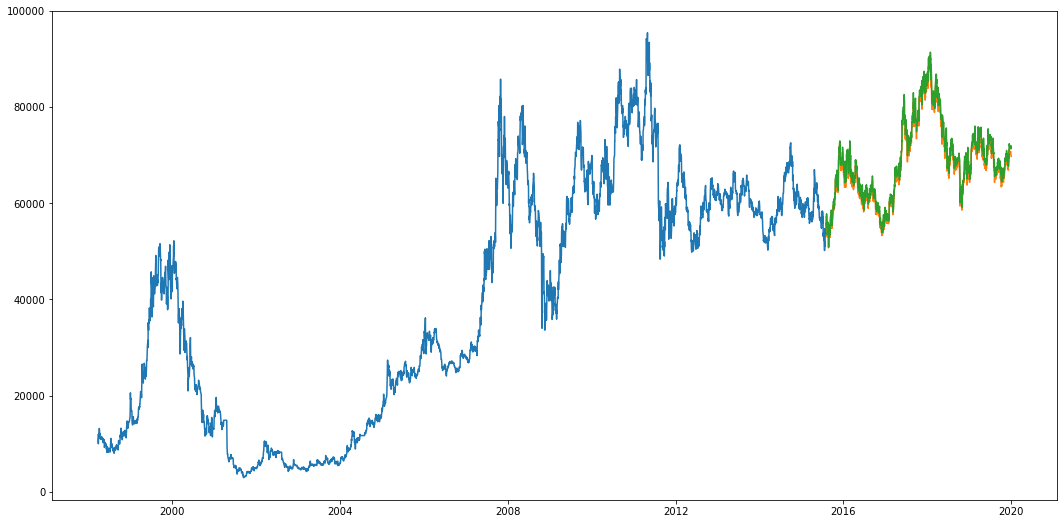

In [5]:
rmse = np.sqrt(np.mean((predictions - data[training_data_len:])**2)) #표준편차
rmse

data =df.filter(['Close'])

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(18,9))
plt.plot(train['Close'])c
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='low')


plt.figure(figsize=(28,14))
plt.plot(valid[['Close','Predictions']][:100])
plt.legend(['Train','Val','Predictions'],loc='low')

In [1]:
rmse

NameError: name 'rmse' is not defined